This is a Decision Tree Classifier for Ecstasy. 

We read the data from a CSV file that has the only needed features for training

In [1]:
import pandas as pd
from sklearn import svm

path = '../drug_consumption_engineered.csv'
data = pd.read_csv(path)

data.head()

,ID,Age,Gender,Education,Countery,Ethnicity,NScore,EScore,OScore,AScore,...,Cannabis,Cannabis_Consume,Choc,Choc_Consume,Ecstasy,Ecstasy_Consume,Nicotine,Nicotine_Consume,VSA,VSA_Consume
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,0,CL5,1,CL0,0,CL2,1,CL0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,1,CL6,1,CL4,1,CL4,1,CL0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL3,1,CL4,1,CL0,0,CL0,0,CL0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL2,1,CL4,1,CL0,0,CL2,1,CL0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL3,1,CL6,1,CL1,0,CL2,1,CL0,0


Then, we can select the features we want to use in training

In [2]:

chosen_feature_columns = ['Age', 'Gender', 'Education', 'Countery', 'Ethnicity', 'NScore', 'EScore', 'OScore', 'AScore', 'CScore', 'Impulsive', 'SS']
chosen_feature = data.loc[:, chosen_feature_columns]
chosen_feature.head()

,Age,Gender,Education,Countery,Ethnicity,NScore,EScore,OScore,AScore,CScore,Impulsive,SS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


Then we select the target class

In [3]:
selected_target = data.Ecstasy_Consume
selected_target.head()

0    0
1    1
2    0
3    0
4    0
Name: Ecstasy_Consume, dtype: int64

In order to see if the learning would improve, we can perform feature selection using sklearn Forward Sequential Feature Selector with half the inpt features

In [4]:

from sklearn.linear_model import RidgeCV
import numpy as np
from sklearn.feature_selection import SelectFromModel

ridge = RidgeCV(alphas=np.logspace(-2, 2)).fit(chosen_feature, selected_target)
importance = np.abs(ridge.coef_)
threshold = np.sort(importance)[-12] + 0.005
sfm = SelectFromModel(ridge, threshold=threshold).fit(chosen_feature, selected_target)


selected_feature = data.loc[:, sfm.get_feature_names_out()]
selected_feature.head()

,Age,Gender,Education,Countery,EScore,OScore,CScore,Impulsive,SS
0,0.49788,0.48246,-0.05921,0.96082,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,1.93886,1.43533,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,0.80523,-0.84732,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.80615,-0.01928,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-1.63340,-0.45174,1.30612,-0.21712,-0.21575


Now that we have the selected features and target, we split the data into train and test datasets 

In [5]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(selected_feature, selected_target, test_size=0.33)

features_train.shape, features_test.shape, target_train.shape, target_test.shape

((1262, 9), (623, 9), (1262,), (623,))

With that, we have the data we want to use the training procesure. So, fit the data to the model

In [6]:
from sklearn import tree 
classifer = tree.DecisionTreeClassifier()
classifer = classifer.fit(features_train, target_train)

Now we can have the confusion matrix

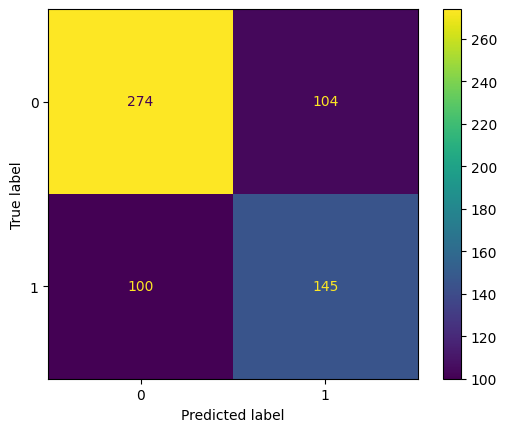

In [7]:
from sklearn import metrics

metrics.ConfusionMatrixDisplay.from_estimator(classifer, features_test, target_test)


Calculating recalls and precisions score

In [8]:
predictions = classifer.predict(features_test)

precision = metrics.precision_score(target_test, predictions)
recall = metrics.recall_score(target_test, predictions)
(precision, recall)

(0.5823293172690763, 0.5918367346938775)

The ROC

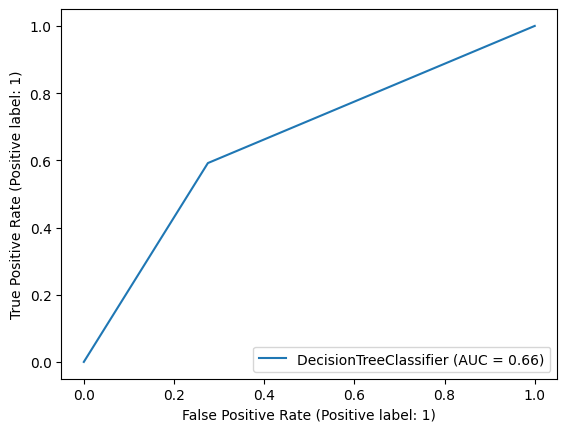

In [9]:

import matplotlib.pyplot as plot

metrics.RocCurveDisplay.from_estimator(classifer, features_test, target_test)